In [2]:
import sys
sys.path.insert(0, '/home/jovyan/functions')
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from wod_data_plots import *
from SDK_functions import *
from pull_data_functions import *
from ipywidgets import widgets


## ***Pulling data from tables with*** <span style='color:orangered'>***geometry*** </span> ***and*** <span style='color:orangered'>***time*** </span>

### WOD data - <span style='color:dodgerblue'> Pulling **cast** level information  </span>

In [1]:
## Specify table, timespan and bounding box

table_name = 'raw_wod.casts'

time_range=['2010-01-01', '2011-01-01']

bbox_coords=[[-180, -90],[180, 90]] ## from [from lon, from lat], [to lon, to lat]

In [ ]:
##pulling cast metadata

df_casts2 = pull_geo_time_data(table_name, time_range, bbox_coords, limit=10)
df_casts2.head()

,cast_id,timestamp,year,dataset_id,changeset_id,subcategory,instrument_id,latitude,longitude,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count,geometry
0,13095482,2010-04-09,2010,None,None,None,None,47.160000,-54.145000,None,0,/nodc/data/oc5.clim.4/wod_update_nc/2010/wod_u...,CA018681,ALFRED NEEDLER (R/V;call sign CG2683;built 198...,None,None,178,POINT (-54.14500 47.16000)
1,13095490,2010-04-09,2010,None,None,None,None,47.176701,-54.136700,None,1,/nodc/data/oc5.clim.4/wod_update_nc/2010/wod_u...,CA018681,ALFRED NEEDLER (R/V;call sign CG2683;built 198...,None,None,143,POINT (-54.13670 47.17670)
2,13095497,2010-04-09,2010,None,None,None,None,47.178299,-54.391701,None,2,/nodc/data/oc5.clim.4/wod_update_nc/2010/wod_u...,CA018681,ALFRED NEEDLER (R/V;call sign CG2683;built 198...,None,None,484,POINT (-54.39170 47.17830)
3,13095499,2010-04-09,2010,None,None,None,None,47.073299,-54.378300,None,3,/nodc/data/oc5.clim.4/wod_update_nc/2010/wod_u...,CA018681,ALFRED NEEDLER (R/V;call sign CG2683;built 198...,None,None,209,POINT (-54.37830 47.07330)
4,13095500,2010-04-09,2010,None,None,None,None,46.955002,-54.706699,None,4,/nodc/data/oc5.clim.4/wod_update_nc/2010/wod_u...,CA018681,ALFRED NEEDLER (R/V;call sign CG2683;built 198...,None,None,146,POINT (-54.70670 46.95500)


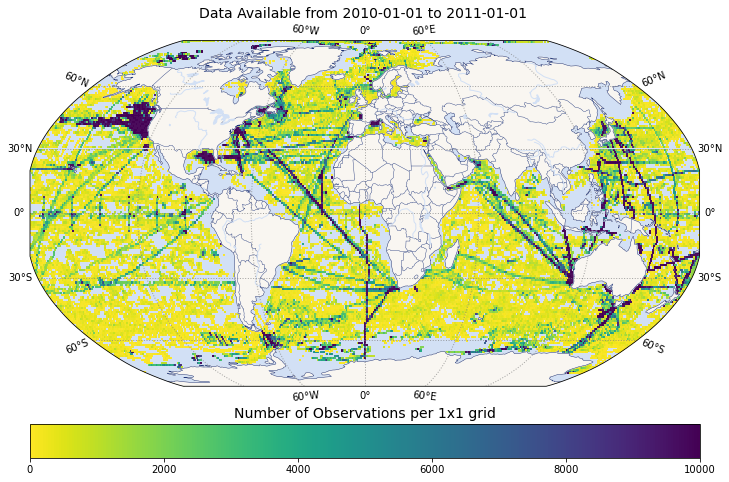

In [ ]:
## plotting cast-level data
plot_wod_obs(df_casts,bbox_coords,vrange=[0, 10000])

### WOD data - <span style='color:dodgerblue'> Pulling WOD **measurements**</span>


In [ ]:
table_name = 'science.wod'

time_range=['2010-01-01', '2010-01-15']

bbox_coords=[[-180, -90],[180, 90]]

In [ ]:
df_wod = pull_geo_time_data(table_name, time_range, bbox_coords, limit=10)
df_wod.head()

,cast_id,latitude,longitude,timestamp,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,salinity,salinity_flag,chlorophyll,chlorophyll_flag,pressure,pressure_flag,nitrate,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id,geometry
0,13046766,27.492001,-49.605,2010-01-01,2010,208.500000,0,NaN,NaN,18.639999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565050,POINT Z (-49.60500 27.49200 -208.50000)
1,13046766,27.492001,-49.605,2010-01-01,2010,209.199997,0,NaN,NaN,18.639999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565051,POINT Z (-49.60500 27.49200 -209.20000)
2,13046766,27.492001,-49.605,2010-01-01,2010,209.800003,0,NaN,NaN,18.629999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565052,POINT Z (-49.60500 27.49200 -209.80000)
3,13046766,27.492001,-49.605,2010-01-01,2010,210.500000,0,NaN,NaN,18.620001,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565053,POINT Z (-49.60500 27.49200 -210.50000)
4,13046766,27.492001,-49.605,2010-01-01,2010,211.199997,0,NaN,NaN,18.620001,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565054,POINT Z (-49.60500 27.49200 -211.20000)


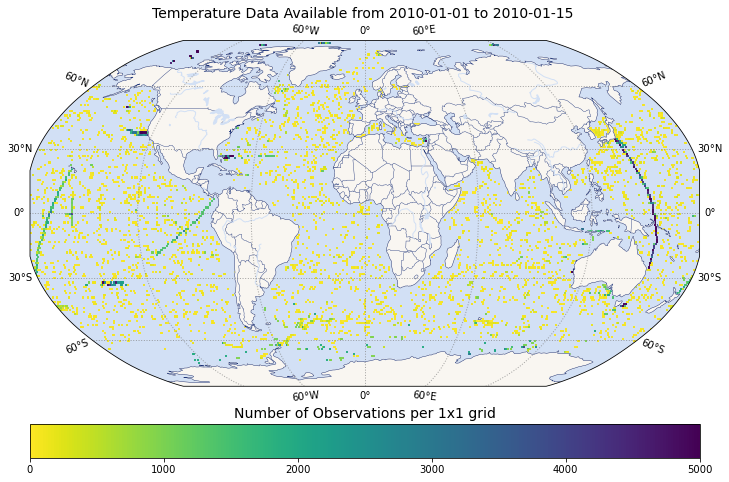

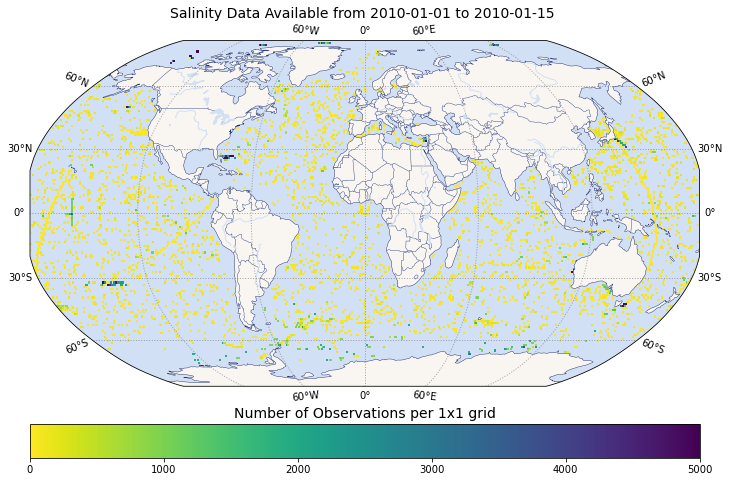

In [ ]:
plot_mult_var_obs(df_wod, bbox_coords, ['temperature', 'salinity'], cmap='viridis_r', vrange=[0, 5000])

### WOD data - <span style='color:dodgerblue'> Pulling WOD **measurements** in **Norway**  </span>

In [ ]:
table_name = 'science.wod'

time_range=['2010-01-01', '2010-12-31']

bbox_coords=[[0, 55],[10, 65]]


In [ ]:
df_wod_nor = pull_geo_time_data(table_name, time_range, bbox_coords, limit=10)
df_wod_nor.head()

,cast_id,latitude,longitude,timestamp,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,salinity,salinity_flag,chlorophyll,chlorophyll_flag,pressure,pressure_flag,nitrate,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id,geometry
0,13046766,27.492001,-49.605,2010-01-01,2010,208.500000,0,NaN,NaN,18.639999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565050,POINT Z (-49.60500 27.49200 -208.50000)
1,13046766,27.492001,-49.605,2010-01-01,2010,209.199997,0,NaN,NaN,18.639999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565051,POINT Z (-49.60500 27.49200 -209.20000)
2,13046766,27.492001,-49.605,2010-01-01,2010,209.800003,0,NaN,NaN,18.629999,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565052,POINT Z (-49.60500 27.49200 -209.80000)
3,13046766,27.492001,-49.605,2010-01-01,2010,210.500000,0,NaN,NaN,18.620001,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565053,POINT Z (-49.60500 27.49200 -210.50000)
4,13046766,27.492001,-49.605,2010-01-01,2010,211.199997,0,NaN,NaN,18.620001,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565054,POINT Z (-49.60500 27.49200 -211.20000)


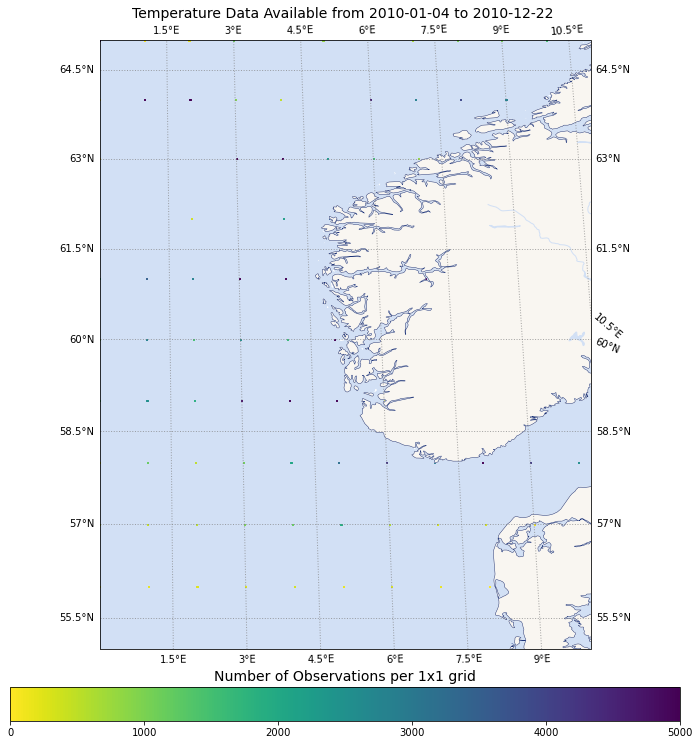

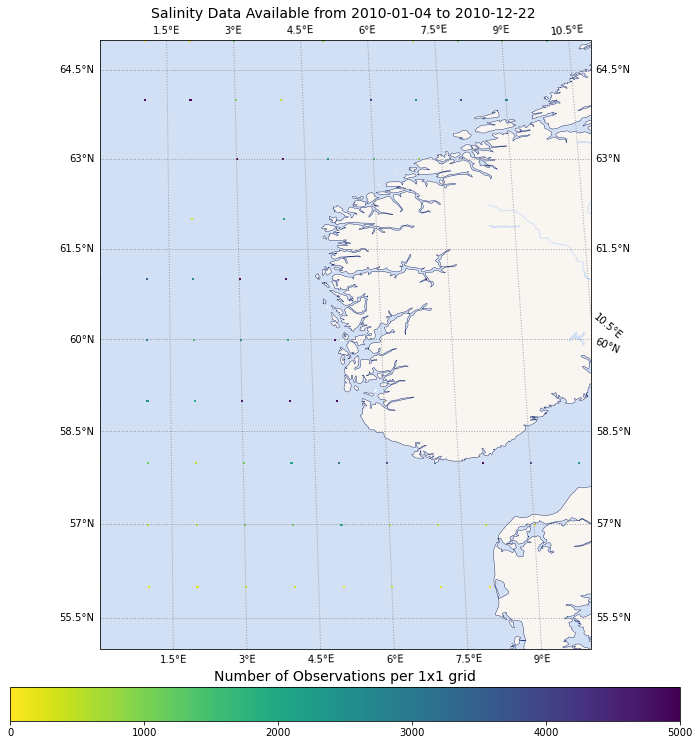

In [ ]:
plot_mult_var_obs(df_wod_nor, bbox_coords, ['temperature', 'salinity'], cmap='viridis_r', vrange=[0, 5000])

## ***Pulling regions of interest with*** <span style='color:orangered'>***geometry*** </span>

## Pulling regions of interest - <span style='color:dodgerblue'> **Marine regions** data  </span>


In [ ]:
df_mr2= pull_geo_data(table_name = 'raw_marineregions.world_seas_iho_v3', limit=10)
df_mr2.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry
0,Rio de La Plata,33,-56.842478,-35.113338,-59.765656,-36.358856,-54.943024,-31.523437,31797,4325,"POLYGON ((-54.94302 -34.94791, -54.97875 -34.9..."
1,Bass Strait,62A,146.424291,-39.450520,143.532508,-41.440274,149.909468,-37.460793,112699,4366,"POLYGON ((149.90464 -37.54325, 149.90500 -37.5..."
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8..."
3,Tasman Sea,63,160.710798,-39.701056,146.872615,-50.866916,175.286985,-30.000000,3344624,4365,"POLYGON ((159.03333 -30.00000, 159.03983 -30.0..."
4,Mozambique Channel,45A,40.877244,-19.304095,32.430623,-26.842402,49.241982,-10.498872,1394283,4261,"POLYGON ((43.38218 -11.37021, 43.42691 -11.374..."


## Pulling regions of interest - <span style='color:dodgerblue'> **Offshore wind farm locations**</span>


In [ ]:
df_hav= pull_geo_data(table_name = 'raw_geonorge.havvind')
df_hav = df_hav.to_crs(epsg=4326)
df_hav.head()

,OBJECTID,IDENT,NAVN,TYPEANLEGG,AREAL,AREAL_DYB,MINDYBDE,MAXDYBDE,GJDYBDE,MINVIND,MAXVIND,GJVIND,MINAVSTKYS,MAXAVSTKYS,MIN_AVSTBE,MAX_AVSTBE,MINBOLGE,MAXBOLGE,GJBOLGE,MINBOLGE50,MAXBOLGE50,GJBOLGE50,MINAVSTPLA,MAXAVSTPLA,MINAVSTTRA,MINVINDPRO,MAXVINDPRO,GJVINDPROD,ID,SORT,URL,OMRAADEKAR,OMRADEANBE,SHAPE_STAr,SHAPE_STLe,geometry
0,1,Nordsjøen 2,Frøyagrunnene,Bunnfast,58.057942,35.91,-69.977264,-5.779030,-33.134323,9.80,10.23,10.036379,8510.106632,18417.122464,3389.821877,11754.581068,2.10,2.40,2.200000,12.30,13.10,12.80,57392.0,67956.0,29114.0,0.4165,0.4420,0.430715,1,4,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne nå,5.805794e+07,30570.564921,"POLYGON ((4.76292 61.71824, 4.60920 61.71532, ..."
1,2,Nordsjøen 3,Olderveggen,Bunnfast,76.461235,62.78,-69.987160,-6.210636,-43.021969,9.51,10.24,10.007013,1946.618569,8668.426589,4716.559340,11296.687807,2.10,2.10,2.100000,12.30,13.10,12.80,77260.0,89495.0,27494.0,0.3825,0.4335,0.413961,2,5,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,7.646124e+07,36289.116088,"POLYGON ((4.79755 61.87272, 4.70548 61.91445, ..."
2,3,Norskehavet 3,Nordøyan - Ytre Vikna,Bunnfast,139.894201,98.97,-69.992264,-5.093023,-36.622326,8.98,9.15,9.087482,11590.636394,17255.692707,1643.542459,13821.565297,2.27,2.27,2.270000,14.53,14.53,14.53,132571.0,150524.0,69091.0,0.3740,0.3910,0.385068,3,8,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,1.398942e+08,58170.107942,"POLYGON ((10.39748 64.79671, 10.47967 65.00023..."
3,4,Norskehavet 6,Gimsøy nord,Bunnfast,245.107703,219.47,-70.000000,-5.000329,-29.000000,7.47,8.31,7.964017,969.166233,14165.260750,1234.867352,14411.924325,0.05,1.15,0.557500,13.00,13.00,13.00,363669.0,389345.0,12820.0,0.3315,0.3485,0.338613,4,11,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Ikke åpne,2.451077e+08,64386.760444,"POLYGON ((13.97954 68.35496, 13.97714 68.40836..."
4,5,Norskehavet 7,Nordmela,Bunnfast,331.999548,281.33,-65.000000,-5.000000,-49.450000,7.65,8.52,8.236054,2442.967165,17659.710278,2852.799454,12946.113447,1.37,2.16,1.806667,12.35,13.59,12.97,342089.0,367101.0,11312.0,0.3400,0.3570,0.348474,5,12,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Ikke åpne,3.319995e+08,76990.357518,"POLYGON ((15.10401 69.15849, 15.16733 69.18171..."


# ***Fusing datasets <span style='color:orangered'>***spatially*** </span>***

## Fusing datasets - <span style='color:dodgerblue'> Marine Region Seas and WOD casts</span> and <span style='color:dodgerblue'>WOD casts</span>

In [76]:
df_wod_mr = spatial_join(df_mr, df_wod, how='inner', op='intersects')
df_wod_mr.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry,index_right,cast_id,latitude,longitude,timestamp,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,salinity,salinity_flag,chlorophyll,chlorophyll_flag,pressure,pressure_flag,nitrate,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id
68,Indian Ocean,45,79.208586,-32.724584,20.002616,-60.000000,146.898219,10.444999,58230954,1904,"POLYGON ((51.41534 10.44500, 51.49521 10.40404...",8,16112303,-27.625174,113.655876,2010-01-01,2010,15.176975,0,209.446548,0.0,-1.000000e+10,-127,-1.000000e+10,-127.0,0.4403,0.0,None,None,None,None,None,None,None,None,None,None,None,None,69201814448242708
68,Indian Ocean,45,79.208586,-32.724584,20.002616,-60.000000,146.898219,10.444999,58230954,1904,"POLYGON ((51.41534 10.44500, 51.49521 10.40404...",9,16112303,-27.625174,113.655876,2010-01-01,2010,15.724565,0,209.384628,0.0,2.227220e+01,0,3.558820e+01,0.0,0.4403,0.0,None,None,None,None,None,None,None,None,None,None,None,None,69201814448242709
75,North Atlantic Ocean,23,-37.624244,29.480034,-83.014914,-0.002563,6.619967,68.638716,34507128,1912,"POLYGON ((-6.26384 62.34582, -6.17706 62.32412...",0,13046766,27.492001,-49.605000,2010-01-01,2010,208.500000,0,NaN,NaN,1.864000e+01,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565050
75,North Atlantic Ocean,23,-37.624244,29.480034,-83.014914,-0.002563,6.619967,68.638716,34507128,1912,"POLYGON ((-6.26384 62.34582, -6.17706 62.32412...",1,13046766,27.492001,-49.605000,2010-01-01,2010,209.199997,0,NaN,NaN,1.864000e+01,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565051
75,North Atlantic Ocean,23,-37.624244,29.480034,-83.014914,-0.002563,6.619967,68.638716,34507128,1912,"POLYGON ((-6.26384 62.34582, -6.17706 62.32412...",2,13046766,27.492001,-49.605000,2010-01-01,2010,209.800003,0,NaN,NaN,1.863000e+01,0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,56035433288565052


## Fusing datasets - <span style='color:dodgerblue'> Offshore wind farm locations</span> and <span style='color:dodgerblue'>WOD casts</span>


In [12]:
df_wod_hav = spatial_join(df_hav, df_casts, how='inner', op='intersects')
df_wod_hav[df_wod_hav.NAVN=='Utsira nord'].head()

,OBJECTID,IDENT,NAVN,TYPEANLEGG,AREAL,AREAL_DYB,MINDYBDE,MAXDYBDE,GJDYBDE,MINVIND,MAXVIND,GJVIND,MINAVSTKYS,MAXAVSTKYS,MIN_AVSTBE,MAX_AVSTBE,MINBOLGE,MAXBOLGE,GJBOLGE,MINBOLGE50,MAXBOLGE50,GJBOLGE50,MINAVSTPLA,MAXAVSTPLA,MINAVSTTRA,MINVINDPRO,MAXVINDPRO,GJVINDPROD,ID,SORT,URL,OMRAADEKAR,OMRADEANBE,SHAPE_STAr,SHAPE_STLe,geometry,index_right,cast_id,timestamp,year,dataset_id,changeset_id,subcategory,instrument_id,latitude,longitude,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
14,15,Nordsjøen 1,Utsira nord,Flytende,1009.65974,1010.0,-280.0,-184.918289,-266.80899,9.58,9.98,9.790504,22438.81974,53396.144899,21979.871291,37470.25694,2.15,2.21,2.1775,12.67,12.81,12.74625,33679.0,54342.0,37517.0,0.4165,0.442,0.427917,16,3,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Dypt vann / Langt til havs,Åpne nå,1.009660e+09,132978.372588,"POLYGON ((4.67176 59.48180, 4.81039 59.10440, ...",367216,15199775,2010-01-30,2010,None,None,None,None,59.255501,4.530167,None,1390,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,NO005303,HAAKON MOSBY (R/V;c.s.LJIT;b.1980;renamed ACC ...,,,244
14,15,Nordsjøen 1,Utsira nord,Flytende,1009.65974,1010.0,-280.0,-184.918289,-266.80899,9.58,9.98,9.790504,22438.81974,53396.144899,21979.871291,37470.25694,2.15,2.21,2.1775,12.67,12.81,12.74625,33679.0,54342.0,37517.0,0.4165,0.442,0.427917,16,3,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Dypt vann / Langt til havs,Åpne nå,1.009660e+09,132978.372588,"POLYGON ((4.67176 59.48180, 4.81039 59.10440, ...",380812,15201941,2010-07-18,2010,None,None,None,None,59.277500,4.346667,None,14986,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,NO005311,JOHAN HJORT (R/V;call sign LDGJ; built 1990; I...,,,254
14,15,Nordsjøen 1,Utsira nord,Flytende,1009.65974,1010.0,-280.0,-184.918289,-266.80899,9.58,9.98,9.790504,22438.81974,53396.144899,21979.871291,37470.25694,2.15,2.21,2.1775,12.67,12.81,12.74625,33679.0,54342.0,37517.0,0.4165,0.442,0.427917,16,3,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Dypt vann / Langt til havs,Åpne nå,1.009660e+09,132978.372588,"POLYGON ((4.67176 59.48180, 4.81039 59.10440, ...",380806,15201938,2010-07-18,2010,None,None,None,None,59.281166,4.675333,None,14980,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,NO005311,JOHAN HJORT (R/V;call sign LDGJ; built 1990; I...,,,271
14,15,Nordsjøen 1,Utsira nord,Flytende,1009.65974,1010.0,-280.0,-184.918289,-266.80899,9.58,9.98,9.790504,22438.81974,53396.144899,21979.871291,37470.25694,2.15,2.21,2.1775,12.67,12.81,12.74625,33679.0,54342.0,37517.0,0.4165,0.442,0.427917,16,3,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Dypt vann / Langt til havs,Åpne nå,1.009660e+09,132978.372588,"POLYGON ((4.67176 59.48180, 4.81039 59.10440, ...",367625,15199800,2010-02-05,2010,None,None,None,None,59.285168,4.665833,None,1799,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,NO005305,G.O. SARS (Call sign LMEL; built 04.2003; IMO9...,,,261
14,15,Nordsjøen 1,Utsira nord,Flytende,1009.65974,1010.0,-280.0,-184.918289,-266.80899,9.58,9.98,9.790504,22438.81974,53396.144899,21979.871291,37470.25694,2.15,2.21,2.1775,12.67,12.81,12.74625,33679.0,54342.0,37517.0,0.4165,0.442,0.427917,16,3,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Dypt vann / Langt til havs,Åpne nå,1.009660e+09,132978.372588,"POLYGON ((4.67176 59.48180, 4.81039 59.10440, ...",391314,15203353,2010-11-14,2010,None,None,None,None,59.287334,4.661500,None,25489,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,NO005311,JOHAN HJORT (R/V;call sign LDGJ; built 1990; I...,,,273


# Create more complicated SQL queries

### Hidden behind a function
## SQL spatial joins - <span style='color:dodgerblue'> WOD measurements located **within** the North Atlantic Ocean</span> 

In [27]:
df = pull_geo_time_intersect(table_name1= 'science.wod', table_name2='raw_marineregions.world_seas_iho_v3', time_range = ['2010-01-01', '2015-01-01'], filter_column="NAME", filter_value = 'North Atlantic Ocean')
df.tail()

,cast_id,latitude,longitude,timestamp,year,z,z_flag,temperature,temperature_flag,salinity,salinity_flag,geometry
995,15123803,23.76692,-45.801979,2010-01-31,2010,710.0,0,7.137,0,34.465000,0.0,POINT Z (-45.80198 23.76692 -710.00000)
996,15123803,23.76692,-45.801979,2010-01-31,2010,717.0,0,7.064,0,34.464001,0.0,POINT Z (-45.80198 23.76692 -717.00000)
997,15123803,23.76692,-45.801979,2010-01-31,2010,724.0,0,6.992,0,34.460999,0.0,POINT Z (-45.80198 23.76692 -724.00000)
998,15123803,23.76692,-45.801979,2010-01-31,2010,732.0,0,6.972,0,34.457001,0.0,POINT Z (-45.80198 23.76692 -732.00000)
999,15123803,23.76692,-45.801979,2010-01-31,2010,739.0,0,6.890,0,34.455002,0.0,POINT Z (-45.80198 23.76692 -739.00000)


## Allow more freedom

In [43]:
query = '''SELECT w.* from science.wod as w
           JOIN raw_marineregions.world_seas_iho_v3 as mr 
           ON ST_Intersects(w.geometry, mr.geometry)
           WHERE "NAME" = 'Tasman Sea'
           AND timestamp>='2010-01-01'::timestamp and timestamp<='2011-01-01'::timestamp
           LIMIT 10'''

df_join = gpd.GeoDataFrame.from_postgis(query, engine, geom_col='geometry')
df_join.head()

,cast_id,latitude,longitude,timestamp,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,salinity,salinity_flag,chlorophyll,chlorophyll_flag,pressure,pressure_flag,nitrate,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id,geometry
0,13807865,-33.766701,151.416702,2010-01-25,2010,188.199997,0,None,None,19.100000,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,59304328602583323,POINT Z (151.41670 -33.76670 -188.20000)
1,13807865,-33.766701,151.416702,2010-01-25,2010,188.899994,0,None,None,19.059999,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,59304328602583324,POINT Z (151.41670 -33.76670 -188.89999)
2,13807865,-33.766701,151.416702,2010-01-25,2010,189.500000,0,None,None,19.040001,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,59304328602583325,POINT Z (151.41670 -33.76670 -189.50000)
3,13807865,-33.766701,151.416702,2010-01-25,2010,190.199997,0,None,None,19.030001,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,59304328602583326,POINT Z (151.41670 -33.76670 -190.20000)
4,13807865,-33.766701,151.416702,2010-01-25,2010,190.800003,0,None,None,19.010000,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,59304328602583327,POINT Z (151.41670 -33.76670 -190.80000)


In [ ]:
display(dropdown_cast)

In [ ]:
display(output_cast)

In [8]:
display(dropdown_year)


Dropdown(description='year', options=('ALL', 2011, 2012), value='ALL')

In [9]:
display(output_year)

Output()

In [10]:
display(dropdown_cast)


Dropdown(description='cast_id', options=('ALL', 15134735, 16621328), value='ALL')

In [13]:
display(output_cast)

Output()

In [6]:

rows_to_display = 20

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_year = widgets.Dropdown(options=unique_sorted_values_plus_ALL(df.year), description='year')

output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(df.head(rows_to_display))
        else:
            display(df[df.year == change.new].head(rows_to_display))
            
dropdown_year.observe(dropdown_year_eventhandler, names='value')

# display(dropdown_cast)


In [19]:
rows_to_display = 5
df = df_casts.iloc[0:1000]
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_cast = widgets.Dropdown(options=unique_sorted_values_plus_ALL(df.cast_id), description='cast_id')

output_cast = widgets.Output()

def dropdown_cast_eventhandler(change):
    output_cast.clear_output()
    with output_cast:
        if (change.new == ALL):
            display(df.head(rows_to_display))
        else:
            display(df[df.cast_id == change.new].head(rows_to_display))
            
dropdown_cast.observe(dropdown_cast_eventhandler, names='value')

display(dropdown_cast)


Dropdown(description='cast_id', options=('ALL', 13165036, 13165187, 13165190, 13165191, 13165194, 13165201, 13…

In [56]:
display(output_cast)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '         cast_id  latitude  longitude …

In [23]:
output_cast = widgets.Output()

def dropdown_cast_eventhandler(change):
    output_cast.clear_output()
    with output_cast:
        display(df[df.cast_id == change.new])
        



In [24]:
display(output_cast)

Output()

In [5]:
def pull_data(table_name, time_range, bbox_coords=[[-180, -90],[180, 90]], limit=10e6):
    params = {'table_name':table_name,
              'lon0':bbox_coords[0][0],
              'lat0':bbox_coords[0][1],
              'lon1':bbox_coords[1][0],
              'lat1':bbox_coords[1][1],
              'from_time':time_range[0],
              'to_time':time_range[1],
              'limit': limit}
    
    query_table = ''' SELECT * from {{ table_name | sqlsafe }}
                      WHERE geometry && st_makeenvelope({{lon0}},{{lat0}},{{lon1}},{{lat1}})
                      AND timestamp>={{from_time}}::timestamp and timestamp<={{to_time}}::timestamp
                      limit {{limit}} '''
    
    j = JinjaSql(param_style='pyformat')
    query, bind_params = j.prepare_query(query_table, params)

    return gpd.GeoDataFrame.from_postgis(query, engine, params=bind_params, geom_col='geometry')



In [74]:
button = widgets.Button(description = 'Pull Data')
display(button)

def on_button_clicked(b):
    df = pull_data('science.wod', time_range=['2014-01-01', '2014-03-01'], bbox_coords=[[-180, -90],[180, 90]], limit=10)
    return df
    
button.on_click(on_button_clicked)

Button(description='Pull Data', style=ButtonStyle())

In [88]:
# from_time = input("Enter start date: YYYY-MM-DD")
# to_time = input("Enter end date: YYYY-MM-DD")
North_coordinate = int(input("Enter your value: North Coordinate"))
South_coordinate = int(input("Enter your value: South Coordinate"))
West_coordinate = int(input("Enter your value: West Coordinate"))
East_coordinate = int(input("Enter your value: East Coordinate"))


Enter your value: North Coordinate 90
Enter your value: South Coordinate -90
Enter your value: West Coordinate -180
Enter your value: East Coordinate 180


In [89]:
North_coordinate

90

In [77]:
text = widgets.Text(description='From time')
# text2 = widgets.IntText(description='To time')

display(text)

Text(value='', description='From time')

In [76]:
df = pull_data('science.wod', time_range=['2010-01-01', '2014-03-01'], bbox_coords=[[-180, -90],[180, 90]], limit=1000)

In [50]:
df.head()

,cast_id,latitude,longitude,timestamp,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,salinity,salinity_flag,chlorophyll,chlorophyll_flag,pressure,pressure_flag,nitrate,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id,geometry
0,13399972,-1.980000,-155.000000,2011-01-04,2011,250.000000,0,NaN,NaN,11.880,0,-1.000000e+10,-127.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,57552441507315719,POINT Z (-155.00000 -1.98000 -250.00000)
1,15134735,-63.033001,133.656006,2011-10-30,2011,936.975952,0,NaN,NaN,4.910,0,3.455600e+01,0.0,NaN,NaN,944.400024,0.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,65003191858626793,POINT Z (133.65601 -63.03300 -936.97595)
2,15134735,-63.033001,133.656006,2011-10-30,2011,983.990967,0,NaN,NaN,4.744,0,3.456000e+01,0.0,NaN,NaN,991.900024,0.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,65003191858626794,POINT Z (133.65601 -63.03300 -983.99097)
3,15134735,-63.033001,133.656006,2011-10-30,2011,1034.656494,0,NaN,NaN,4.536,0,3.456500e+01,0.0,NaN,NaN,1043.099976,0.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,65003191858626795,POINT Z (133.65601 -63.03300 -1034.65649)
4,15134735,-63.033001,133.656006,2011-10-30,2011,1087.782593,0,NaN,NaN,4.314,0,3.456900e+01,0.0,NaN,NaN,1096.800049,0.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,65003191858626796,POINT Z (133.65601 -63.03300 -1087.78259)


In [89]:
table_name = 'science.casts'
params = {'table_name':table_name}

query_table = ''' SELECT * FROM {{ table_name | sqlsafe }} limit 1'''
j = JinjaSql(param_style='pyformat')
query, bind_params = j.prepare_query(query_table, params)

columns = list(pd.read_sql(query, engine, params=bind_params).columns)
d={-
for c in column_names



In [90]:
columns

['cast_id',
 'timestamp',
 'year',
 'dataset_id',
 'changeset_id',
 'subcategory',
 'instrument_id',
 'latitude',
 'longitude',
 'country',
 'wod_cast_index',
 'wod_dataset_id',
 'wod_cruise_identifier',
 'platform',
 'institute',
 'project',
 'observation_count',
 'geometry']

In [63]:
df = pull_data('science.casts', 20)

In [65]:
df_mr = pull_data('raw_marineregions.world_seas_iho_v3')

In [66]:
df_mr.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry
0,Rio de La Plata,33,-56.842478,-35.113338,-59.765656,-36.358856,-54.943024,-31.523437,31797,4325,"POLYGON ((-54.94302 -34.94791, -54.97875 -34.9..."
1,Bass Strait,62A,146.424291,-39.450520,143.532508,-41.440274,149.909468,-37.460793,112699,4366,"POLYGON ((149.90464 -37.54325, 149.90500 -37.5..."
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8..."
3,Tasman Sea,63,160.710798,-39.701056,146.872615,-50.866916,175.286985,-30.000000,3344624,4365,"POLYGON ((159.03333 -30.00000, 159.03983 -30.0..."
4,Mozambique Channel,45A,40.877244,-19.304095,32.430623,-26.842402,49.241982,-10.498872,1394283,4261,"POLYGON ((43.38218 -11.37021, 43.42691 -11.374..."


In [48]:
 params = {
    'table_name': 'science.casts',
    'start_time': '2014-01-01',
    'end_time': '2014-03-01'}
    
cast_query = '''SELECT c.*, ST_AsText(st_asewkt(c.geometry)) as geometry from {{ table_name | sqlsafe }} as c
            WHERE timestamp>={{ start_time }}::timestamp and timestamp<={{ end_time }}::timestamp'''


j = JinjaSql(param_style='pyformat')
query, bind_params = j.prepare_query(cast_query, params)

df = pd.read_sql(query, engine, params=bind_params)

In [10]:
df.head()

,cast_id,timestamp,year,dataset_id,changeset_id,subcategory,instrument_id,latitude,longitude,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count,geometry,geometry
0,16492054,2014-01-01,2014,None,None,None,None,-15.499400,-24.999901,UNITED STATES,0,/nodc/data/oc5.clim.4/wod_update_nc/2014/wod_o...,US035879,RONALD H. BROWN (NOAA ship;R/V;c.s.WTEC; built...,,,24,0101000020E610000000000080F9FF38C000000060B1FF...,POINT(-24.9999008178711 -15.499400138855)
1,16492055,2014-01-01,2014,None,None,None,None,-16.000500,-25.001499,UNITED STATES,1,/nodc/data/oc5.clim.4/wod_update_nc/2014/wod_o...,US035879,RONALD H. BROWN (NOAA ship;R/V;c.s.WTEC; built...,,,24,0101000020E610000000000040620039C0000000C02000...,POINT(-25.0014991760254 -16.0004997253418)
2,16492056,2014-01-01,2014,None,None,None,None,-16.500299,-25.000099,UNITED STATES,2,/nodc/data/oc5.clim.4/wod_update_nc/2014/wod_o...,US035879,RONALD H. BROWN (NOAA ship;R/V;c.s.WTEC; built...,,,24,0101000020E610000000000080060039C0000000A01380...,POINT(-25.0000991821289 -16.5002994537354)
3,16492057,2014-01-02,2014,None,None,None,None,-17.000000,-25.000000,UNITED STATES,3,/nodc/data/oc5.clim.4/wod_update_nc/2014/wod_o...,US035879,RONALD H. BROWN (NOAA ship;R/V;c.s.WTEC; built...,,,24,0101000020E610000000000000000039C0000000000000...,POINT(-25 -17)
4,17112686,2014-01-02,2014,None,None,None,None,51.917500,4.249833,NETHERLANDS,4,/nodc/data/oc5.clim.4/wod_update_nc/2014/wod_o...,NL001606,MULTIPLE SHIPS,,,1,0101000020E610000000000040D4FF1040000000A070F5...,POINT(4.24983310699463 51.9174995422363)


In [6]:
params = {'table_name': 'raw_marineregions.world_seas_iho_v3'}

mr_query = '''SELECT mr.*, ST_AsText(st_asewkt(geometry)) as geometry
from {{ table_name | sqlsafe }} as mr limit 10'''

          
j = JinjaSql(param_style='pyformat')
query, bind_params = j.prepare_query(mr_query, params)

df_mr = pd.read_sql(query, engine, params=bind_params)

In [7]:
df_mr.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry,geometry
0,Rio de La Plata,33,-56.842478,-35.113338,-59.765656,-36.358856,-54.943024,-31.523437,31797,4325,0103000020E610000096000000EA0B000018E3C1FFB478...,"POLYGON((-54.943023652717 -34.9479068830786,-5..."
1,Bass Strait,62A,146.424291,-39.450520,143.532508,-41.440274,149.909468,-37.460793,112699,4366,0103000020E6100000DC00000082180000A20680D4F2BC...,"POLYGON((149.904642343569 -37.5432478185318,14..."
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,0103000020E6100000070200004C37000060259A4E0AF1...,"POLYGON((143.532508183543 -38.8553450585602,14..."
3,Tasman Sea,63,160.710798,-39.701056,146.872615,-50.866916,175.286985,-30.000000,3344624,4365,0103000020E6100000120200003CFD01003F7F130A11E1...,"POLYGON((159.03333 -30,159.039834146342 -30.04..."
4,Mozambique Channel,45A,40.877244,-19.304095,32.430623,-26.842402,49.241982,-10.498872,1394283,4261,0103000020E6100000B804000023670000A8E10040EBB0...,"POLYGON((43.3821792606644 -11.3702056409775,43..."


In [ ]:
# widgets.IntSlider(
#     min=df.z.min(),
#     max=df.z.max(),
#     step=1,
#     description='Depth:',
#     value=100
# )

In [2]:
db = {
    'host': 'postgresql-dev-server-1.postgres.database.azure.com',
    'user': 'psqladminun@postgresql-dev-server-1',
    'dbname': 'dev_odp_db',
    'pswd': 'pnN1OSy8LB6LQl2K',
    'port': 5432
}

In [ ]:
# slider = widgets.IntSlider()
# text = widgets.IntText()
# display(slider, text)

# widgets.jslink((slider, 'value'), (text, 'value'));

In [1]:
%pip install seaborn
%pip install jinjasql
%pip install sqlalchemy
%pip install psycopg2-binary
%pip install cmocean
%conda install -c conda-forge cartopy
%conda install -c conda-forge ipywidgets
%conda install geopandas
%pip install rtree
%pip install geopandas

%pip install PyGEOS>=0.8

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached jinjasql-0.1.8-py3-none-any.whl (4.9 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached psycopg2_binary-2.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.4 MB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kern